In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
df_ = pd.read_csv("C:\\Users\\Admin\\Downloads\\ToyotaCorolla.csv", encoding='latin1')
df_.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df_['Met_Color'].value_counts()

Met_Color
1    969
0    467
Name: count, dtype: int64

In [6]:
df = df_.iloc[:,[2,3,6,8,11,12,13,14,15,16,17]]

In [7]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,0,2000,3,4,5,210,1165
1,13750,23,72937,90,0,2000,3,4,5,210,1165
2,13950,24,41711,90,0,2000,3,4,5,210,1165
3,14950,26,48000,90,0,2000,3,4,5,210,1165
4,13750,30,38500,90,0,2000,3,4,5,210,1170


In [8]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,-0.055371,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.109363,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,-0.055371,0.306996,0.109363,NaN,-0.005452,1.000000,0.626134


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


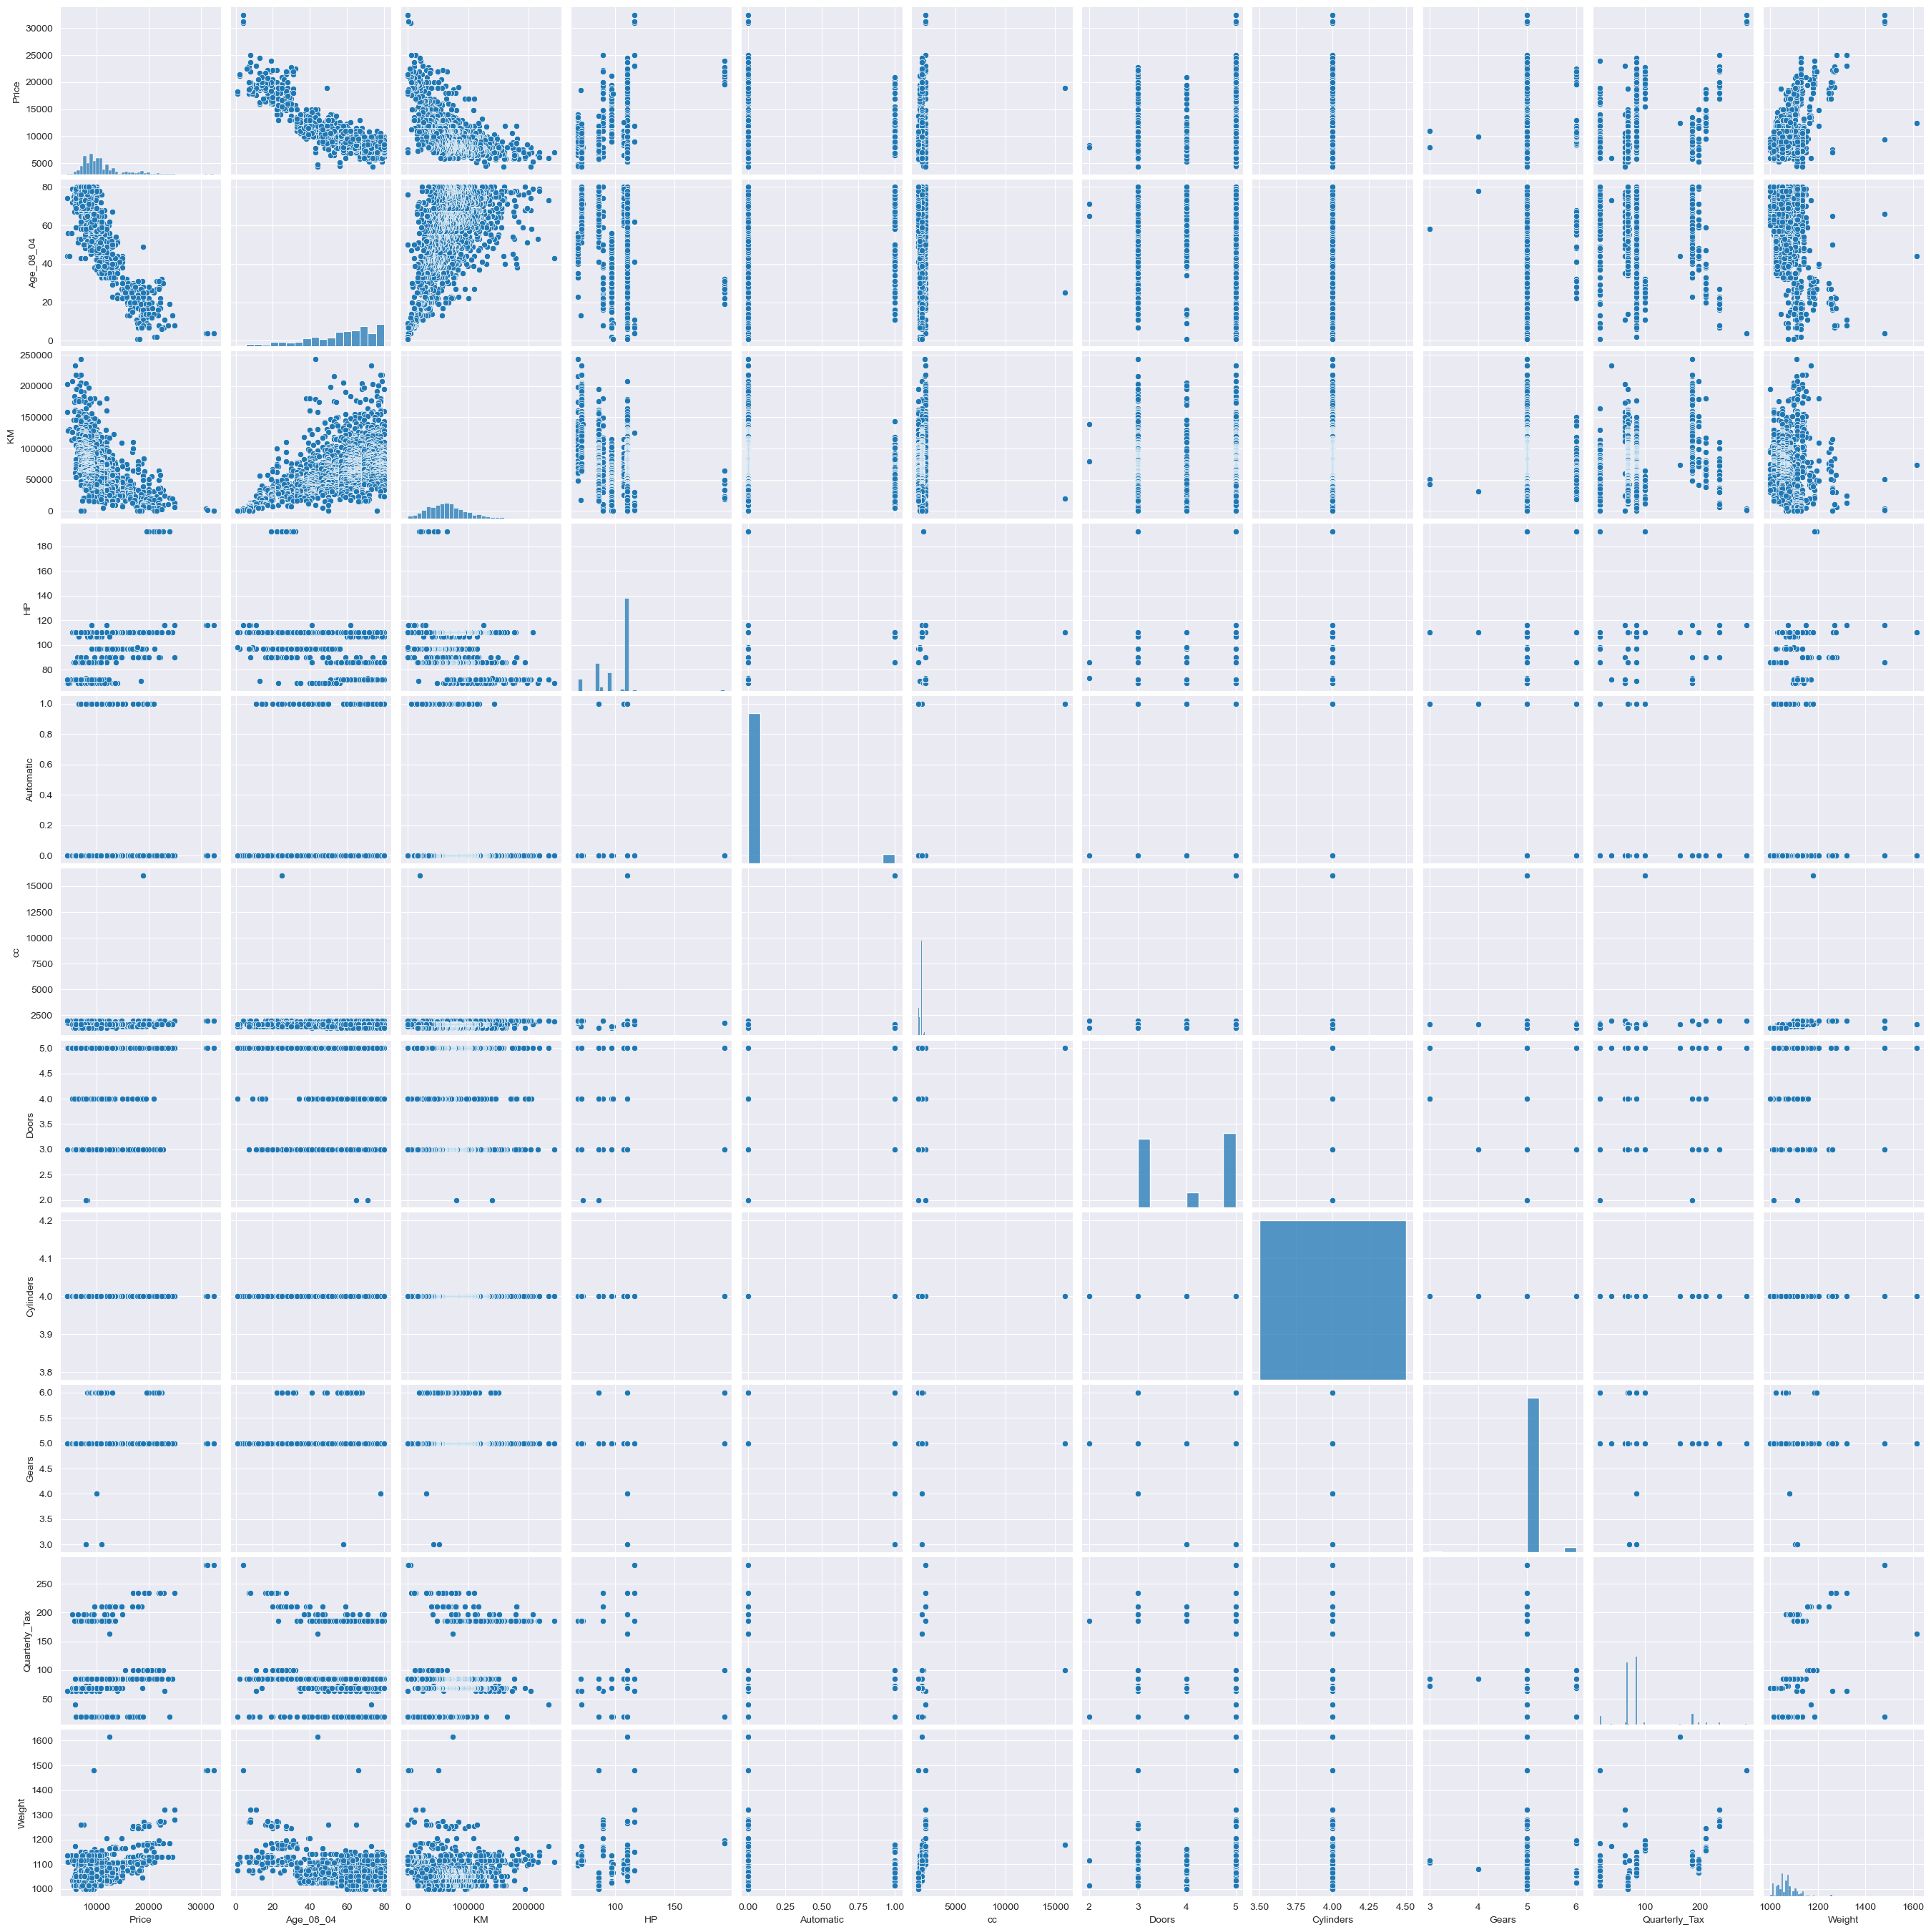

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

## Calculating VIF

In [10]:
rsq_Age_08_04 = smf.ols('Age_08_04 ~ KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=df).fit().rsquared
vif_Age_08_04 = 1/(1-rsq_Age_08_04)

rsq_KM = smf.ols('KM ~ Age_08_04 + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=df).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP ~ Age_08_04 + KM + cc + Doors + Gears + Quarterly_Tax + Weight',data=df).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc ~ Age_08_04 + KM + HP + Doors + Gears + Quarterly_Tax + Weight',data=df).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Doors = smf.ols('Doors ~ Age_08_04 + KM + HP + cc + Gears + Quarterly_Tax + Weight',data=df).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears ~ Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax + Weight',data=df).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight',data=df).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) 

rsq_Weight = smf.ols('Weight ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax',data=df).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
      'VIF':[vif_Age_08_04, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears, vif_Quarterly_Tax, vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


## Building a model

In [11]:
model = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=df).fit()

In [12]:
# Finding Coefficient parameters
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [13]:
# Finding tvalues and pvalues
print(model.tvalues)
print(model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64
Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [14]:
# Finding rsquared value
model.rsquared

0.8637627463428192

## Residual Analysis

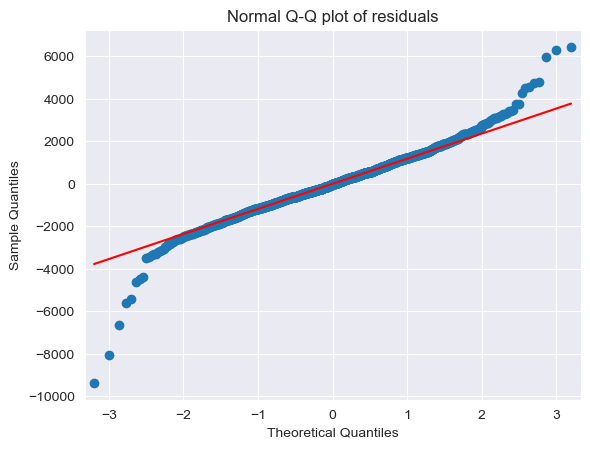

In [15]:
model = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=df).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
list(np.where(model.resid<-8000))

[array([221, 601], dtype=int64)]

In [17]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

## Cook’s Distance

In [18]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

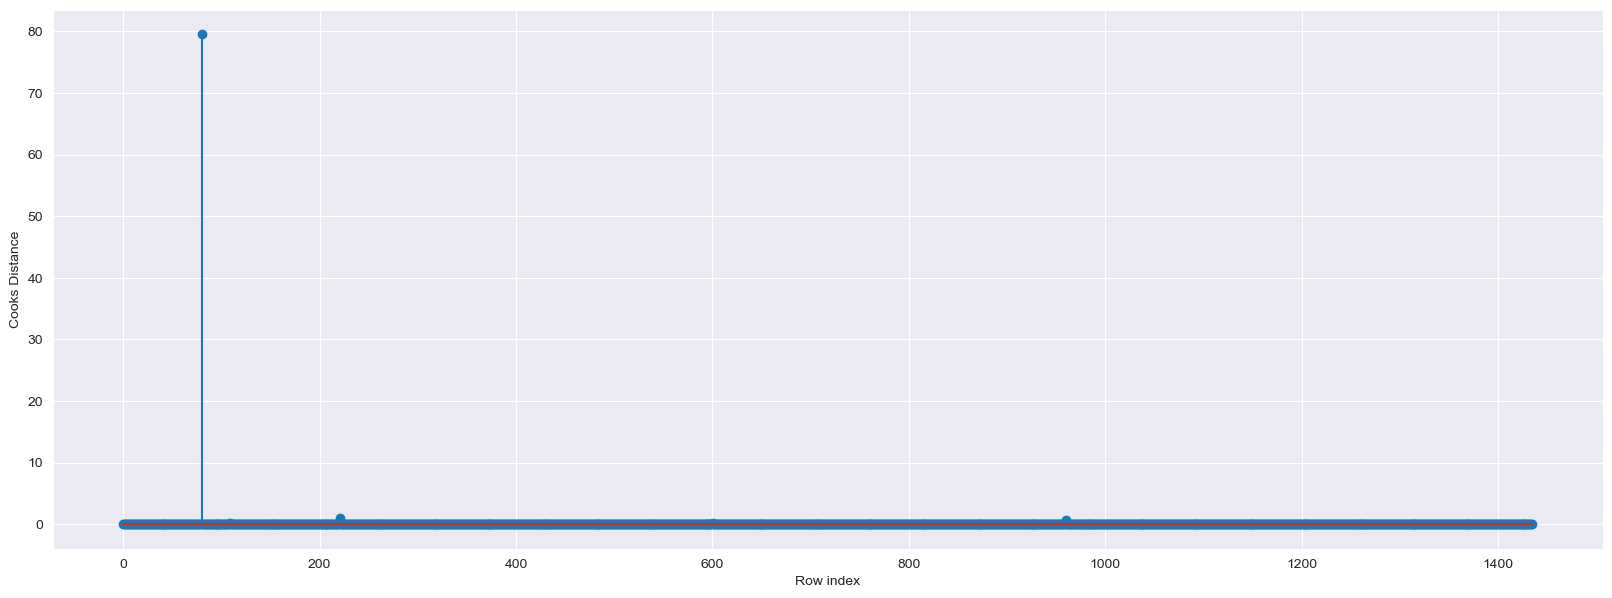

In [19]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [20]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624136568)

In [21]:
df[df.index.isin([80])]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,1,16000,5,4,5,100,1180


In [22]:
df1 = df.drop(df.index[[80]],axis=0).reset_index(drop=True)

In [23]:
df1[df1.index.isin([80])]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
80,17250,29,20000,110,0,1600,5,4,5,85,1115


## Making a new model

In [24]:
model1 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=df1).fit()

In [25]:
# Finding Coefficient parameters
model1.params

Intercept       -6284.740060
Age_08_04        -120.455049
KM                 -0.017849
HP                 39.346295
cc                 -2.524177
Doors             -27.228488
Gears             523.941556
Quarterly_Tax       9.043968
Weight             20.165459
dtype: float64

In [26]:
# Finding tvalues and pvalues
print(model1.tvalues)
print(model1.pvalues)

Intercept        -4.545107
Age_08_04       -47.021323
KM              -13.972555
HP               13.515507
cc               -8.215903
Doors            -0.693871
Gears             2.716621
Quarterly_Tax     6.347531
Weight           18.075652
dtype: float64
Intercept         5.954986e-06
Age_08_04        3.232372e-292
KM                1.121552e-41
HP                2.960385e-39
cc                4.674360e-16
Doors             4.878758e-01
Gears             6.674954e-03
Quarterly_Tax     2.933269e-10
Weight            6.409190e-66
dtype: float64


In [27]:
# Finding rsquared value
model1.rsquared

0.8693790488655818

## High Influence points

In [28]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.025087108013937282

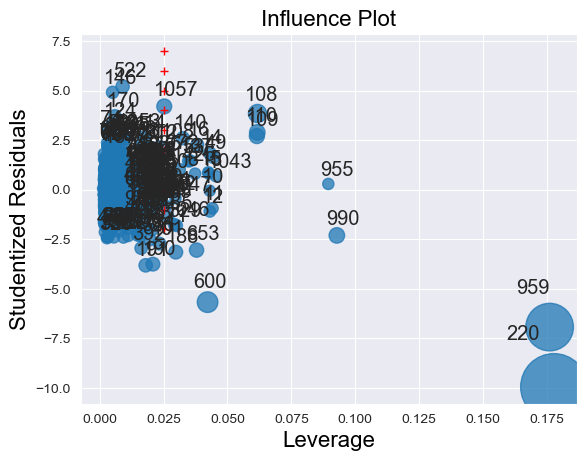

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model1,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

## Improving the model

In [30]:
df2=df1.drop(df1.index[[220,959,955,990,600]],axis=0).reset_index(drop=True)
df2.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,0,2000,3,4,5,210,1165
1,13750,23,72937,90,0,2000,3,4,5,210,1165
2,13950,24,41711,90,0,2000,3,4,5,210,1165
3,14950,26,48000,90,0,2000,3,4,5,210,1165
4,13750,30,38500,90,0,2000,3,4,5,210,1170


## Building a new model

In [32]:
model2 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=df2).fit()

In [33]:
# Finding Coefficient parameters
model2.params

Intercept       -15480.510929
Age_08_04         -110.068224
KM                  -0.017668
HP                  34.948103
cc                  -3.709378
Doors             -153.386695
Gears              276.335066
Quarterly_Tax        3.631738
Weight              32.438794
dtype: float64

In [34]:
# Finding tvalues and pvalues
print(model2.tvalues)
print(model2.pvalues)

Intercept       -10.669168
Age_08_04       -45.124582
KM              -14.992053
HP               12.843415
cc              -12.521012
Doors            -4.150745
Gears             1.413660
Quarterly_Tax     2.673969
Weight           25.282698
dtype: float64
Intercept         1.284605e-25
Age_08_04        1.236354e-276
KM                2.788451e-47
HP                8.437350e-36
cc                3.397450e-34
Doors             3.510824e-05
Gears             1.576807e-01
Quarterly_Tax     7.581851e-03
Weight           9.168181e-117
dtype: float64


In [35]:
# Finding rsquared value
model2.rsquared

0.890117918984022

## High Influence points

In [36]:
k = df2.shape[1]
n = df2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.025174825174825173

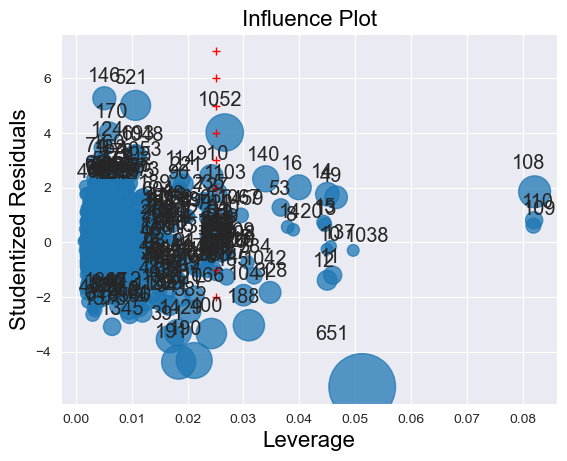

In [37]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model2,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

## Improving the model

In [38]:
df3=df2.drop(df1.index[[651,108,109,110]],axis=0).reset_index(drop=True)
df3.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,0,2000,3,4,5,210,1165
1,13750,23,72937,90,0,2000,3,4,5,210,1165
2,13950,24,41711,90,0,2000,3,4,5,210,1165
3,14950,26,48000,90,0,2000,3,4,5,210,1165
4,13750,30,38500,90,0,2000,3,4,5,210,1170


## Building a new model

In [39]:
model3 = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=df3).fit()

In [40]:
# Finding Coefficient parameters
model3.params

Intercept       -15764.075154
Age_08_04         -109.992371
KM                  -0.017459
HP                  33.487269
cc                  -3.541722
Doors             -161.006383
Gears              283.451085
Quarterly_Tax        2.331845
Weight              32.681772
dtype: float64

In [41]:
# Finding tvalues and pvalues
print(model3.tvalues)
print(model3.pvalues)

Intercept       -10.314781
Age_08_04       -44.471788
KM              -14.936183
HP               12.366624
cc              -11.597412
Doors            -4.328210
Gears             1.461519
Quarterly_Tax     1.707926
Weight           22.860231
dtype: float64
Intercept         4.198205e-24
Age_08_04        4.096462e-271
KM                5.879247e-47
HP                1.962307e-33
cc                8.952303e-30
Doors             1.608747e-05
Gears             1.440947e-01
Quarterly_Tax     8.786905e-02
Weight            1.030747e-98
dtype: float64


In [42]:
# Finding rsquared value
model3.rsquared

0.8843844959709157

### So here we get 88.43% accuracy in this model

## Table containing R^2 value for each prepared model

In [43]:
d2={'Prepared_Models':['Model','Model_1','Model_2','Model_3'],'Rsquared':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared]}
table=pd.DataFrame(d2)
table 

,Prepared_Models,Rsquared
0,Model,0.863763
1,Model_1,0.869379
2,Model_2,0.890118
3,Model_3,0.884384


### So the best model is Model_2 in which we are getting 89.01% accuracy, So that is the best model